In [1]:
import numpy as np
import random
import math
import spectra
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns; sns.set()

In [27]:
plate=pd.read_excel("1_hr_plate.xlsx",index_col=0)
first=pd.read_csv("1hrs.csv")
sample=[]
time=[]
for well in plate.itertuples():
    for entry in well[1:]:
        
        entry=entry.split(' ')
        if "PBS" in entry:
            sample.extend(["PBS" for x in range(30)])
            time.extend([time[-1] for x in range(30)])
        else:
            sample.extend([entry[0] for x in range(30)])
            time.extend([entry[1] for x in range(30)])

first['Pulse_Size']=sample
first['Time_Point']=time
gfp_quarter=first.loc[(first.Gate=="mCherry-/GFP+") & (first.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].mean()
mCherry_quarter=first.loc[(first.Gate=="mCherry+/GFP-") & (first.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].mean()
gfp_half=first.loc[(first.Gate=="mCherry-/GFP+") & (first.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].mean()
mCherry_half=first.loc[(first.Gate=="mCherry+/GFP-") & (first.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].mean()
gfp_full=first.loc[(first.Gate=="mCherry-/GFP+") & (first.Pulse_Size=="1")].groupby("Time_Point")["Count"].mean()
mCherry_full=first.loc[(first.Gate=="mCherry+/GFP-") & (first.Pulse_Size=="1")].groupby("Time_Point")["Count"].mean()
gfp_double=first.loc[(first.Gate=="mCherry-/GFP+") & (first.Pulse_Size=="2")].groupby("Time_Point")["Count"].mean()
mCherry_double=first.loc[(first.Gate=="mCherry+/GFP-") & (first.Pulse_Size=="2")].groupby("Time_Point")["Count"].mean()
#standard deviations 
gfp_quarter_std=first.loc[(first.Gate=="mCherry-/GFP+") & (first.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].std()
mCherry_quarter_std=first.loc[(first.Gate=="mCherry+/GFP-") & (first.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].std()
gfp_half_std=first.loc[(first.Gate=="mCherry-/GFP+") & (first.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].std()
mCherry_half_std=first.loc[(first.Gate=="mCherry+/GFP-") & (first.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].std()
gfp_full_std=first.loc[(first.Gate=="mCherry-/GFP+") & (first.Pulse_Size=="1")].groupby("Time_Point")["Count"].std()
mCherry_full_std=first.loc[(first.Gate=="mCherry+/GFP-") & (first.Pulse_Size=="1")].groupby("Time_Point")["Count"].std()
gfp_double_std=first.loc[(first.Gate=="mCherry-/GFP+") & (first.Pulse_Size=="2")].groupby("Time_Point")["Count"].std()
mCherry_double_std=first.loc[(first.Gate=="mCherry+/GFP-") & (first.Pulse_Size=="2")].groupby("Time_Point")["Count"].std()


In [28]:
raw_dog = pd.concat([gfp_quarter,mCherry_quarter,gfp_half,mCherry_half,gfp_full,mCherry_full,gfp_double,mCherry_double],axis=1)
standard_1=pd.concat([gfp_quarter_std,mCherry_quarter_std,gfp_half_std,mCherry_half_std,gfp_full_std,mCherry_full_std,gfp_double_std,mCherry_double_std],axis=1)
standard_1.columns=['0.25 GFP','0.25 mCherry','0.5 GFP','0.5 mCherry','1 GFP','1 mCherry','2 GFP','2 mCherry']
raw_dog.columns=['0.25 GFP','0.25 mCherry','0.5 GFP','0.5 mCherry','1 GFP','1 mCherry','2 GFP','2 mCherry']


In [29]:
plate2=pd.read_excel("25_hr_plate.xlsx",index_col=0)
second=pd.read_csv("2_5hrs.csv")
sample=[]
time=[]
for well in plate2.itertuples():
    for entry in well[1:]:
        
        entry=entry.split(' ')
        if "PBS" in entry:
            sample.extend(["PBS" for x in range(30)])
            time.extend([time[-1] for x in range(30)])
        else:
            sample.extend([entry[0] for x in range(30)])
            time.extend([entry[1] for x in range(30)])
second['Pulse_Size']=sample
second['Time_Point']=time
gfp_quarter=second.loc[(second.Gate=="mCherry-/GFP+") & (second.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].mean()
mCherry_quarter=second.loc[(second.Gate=="mCherry+/GFP-") & (second.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].mean()
gfp_half=second.loc[(second.Gate=="mCherry-/GFP+") & (second.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].mean()
mCherry_half=second.loc[(second.Gate=="mCherry+/GFP-") & (second.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].mean()
gfp_full=second.loc[(second.Gate=="mCherry-/GFP+") & (second.Pulse_Size=="1")].groupby("Time_Point")["Count"].mean()
mCherry_full=second.loc[(first.Gate=="mCherry+/GFP-") & (second.Pulse_Size=="1")].groupby("Time_Point")["Count"].mean()
gfp_double=second.loc[(first.Gate=="mCherry-/GFP+") & (second.Pulse_Size=="2")].groupby("Time_Point")["Count"].mean()
mCherry_double=second.loc[(first.Gate=="mCherry+/GFP-") & (second.Pulse_Size=="2")].groupby("Time_Point")["Count"].mean()
#standard deviation 

gfp_quarter_std=second.loc[(second.Gate=="mCherry-/GFP+") & (second.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].std()
mCherry_quarter_std=second.loc[(second.Gate=="mCherry+/GFP-") & (second.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].std()
gfp_half_std=second.loc[(second.Gate=="mCherry-/GFP+") & (second.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].std()
mCherry_half_std=second.loc[(second.Gate=="mCherry+/GFP-") & (second.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].std()
gfp_full_std=second.loc[(second.Gate=="mCherry-/GFP+") & (second.Pulse_Size=="1")].groupby("Time_Point")["Count"].std()
mCherry_full_std=second.loc[(first.Gate=="mCherry+/GFP-") & (second.Pulse_Size=="1")].groupby("Time_Point")["Count"].std()
gfp_double_std=second.loc[(first.Gate=="mCherry-/GFP+") & (second.Pulse_Size=="2")].groupby("Time_Point")["Count"].std()
mCherry_double_std=second.loc[(first.Gate=="mCherry+/GFP-") & (second.Pulse_Size=="2")].groupby("Time_Point")["Count"].std()


In [30]:
raw_dog2 = pd.concat([gfp_quarter,mCherry_quarter,gfp_half,mCherry_half,gfp_full,mCherry_full,gfp_double,mCherry_double],axis=1)
raw_dog2.columns=raw_dog.columns=['0.25 GFP','0.25 mCherry','0.5 GFP','0.5 mCherry','1 GFP','1 mCherry','2 GFP','2 mCherry']
standard_2=pd.concat([gfp_quarter_std,mCherry_quarter_std,gfp_half_std,mCherry_half_std,gfp_full_std,mCherry_full_std,gfp_double_std,mCherry_double_std],axis=1)
standard_2.columns=['0.25 GFP','0.25 mCherry','0.5 GFP','0.5 mCherry','1 GFP','1 mCherry','2 GFP','2 mCherry']


In [31]:
plate3=pd.read_excel("4_hr_plate.xlsx",index_col=0)
third=pd.read_csv("4hrs.csv")
sample=[]
time=[]
for well in plate3.itertuples():
    for entry in well[1:]:
        
        entry=entry.split(' ')
        if "PBS" in entry:
            sample.extend(["PBS" for x in range(30)])
            time.extend([time[-1] for x in range(30)])
        else:
            sample.extend([entry[0] for x in range(30)])
            time.extend([entry[1] for x in range(30)])
third['Pulse_Size']=sample
third['Time_Point']=time
gfp_quarter=third.loc[(third.Gate=="mCherry-/GFP+") & (third.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].mean()
mCherry_quarter=third.loc[(third.Gate=="mCherry+/GFP-") & (third.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].mean()
gfp_half=third.loc[(third.Gate=="mCherry-/GFP+") & (third.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].mean()
mCherry_half=third.loc[(third.Gate=="mCherry+/GFP-") & (third.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].mean()
gfp_full=third.loc[(third.Gate=="mCherry-/GFP+") & (third.Pulse_Size=="1")].groupby("Time_Point")["Count"].mean()
mCherry_full=third.loc[(third.Gate=="mCherry+/GFP-") & (third.Pulse_Size=="1")].groupby("Time_Point")["Count"].mean()
gfp_double=third.loc[(third.Gate=="mCherry-/GFP+") & (third.Pulse_Size=="2")].groupby("Time_Point")["Count"].mean()
mCherry_double=third.loc[(third.Gate=="mCherry+/GFP-") & (third.Pulse_Size=="2")].groupby("Time_Point")["Count"].mean()
#Standard Deviation
gfp_quarter_std=third.loc[(third.Gate=="mCherry-/GFP+") & (third.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].std()
mCherry_quarter_std=third.loc[(third.Gate=="mCherry+/GFP-") & (third.Pulse_Size=="0.25")].groupby("Time_Point")["Count"].std()
gfp_half_std=third.loc[(third.Gate=="mCherry-/GFP+") & (third.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].std()
mCherry_half_std=third.loc[(third.Gate=="mCherry+/GFP-") & (third.Pulse_Size=="0.5")].groupby("Time_Point")["Count"].std()
gfp_full_std=third.loc[(third.Gate=="mCherry-/GFP+") & (third.Pulse_Size=="1")].groupby("Time_Point")["Count"].std()
mCherry_full_std=third.loc[(third.Gate=="mCherry+/GFP-") & (third.Pulse_Size=="1")].groupby("Time_Point")["Count"].std()
gfp_double_std=third.loc[(third.Gate=="mCherry-/GFP+") & (third.Pulse_Size=="2")].groupby("Time_Point")["Count"].std()
mCherry_double_std=third.loc[(third.Gate=="mCherry+/GFP-") & (third.Pulse_Size=="2")].groupby("Time_Point")["Count"].std()



In [32]:
raw_dog3 = pd.concat([gfp_quarter,mCherry_quarter,gfp_half,mCherry_half,gfp_full,mCherry_full,gfp_double,mCherry_double],axis=1)
raw_dog3.columns=raw_dog.columns=['0.25 GFP','0.25 mCherry','0.5 GFP','0.5 mCherry','1 GFP','1 mCherry','2 GFP','2 mCherry']
standard_3=pd.concat([gfp_quarter_std,mCherry_quarter_std,gfp_half_std,mCherry_half_std,gfp_full_std,mCherry_full_std,gfp_double_std,mCherry_double_std],axis=1)
standard_3.columns=['0.25 GFP','0.25 mCherry','0.5 GFP','0.5 mCherry','1 GFP','1 mCherry','2 GFP','2 mCherry']
total_standard=pd.concat([standard_1,standard_2,standard_3])

h7=pd.concat([raw_dog,raw_dog2,raw_dog3])
h7["0.25 GFP frac"]=h7['0.25 GFP']/(h7['0.25 GFP']+h7['0.25 mCherry'])
h7["max 0.25 GFP frac"]=np.minimum((h7['0.25 GFP']+total_standard['0.25 GFP'])/(h7['0.25 GFP']+h7['0.25 mCherry']),1)
h7["min 0.25 GFP frac"]=np.maximum((h7['0.25 GFP']-total_standard['0.25 GFP'])/(h7['0.25 GFP']+h7['0.25 mCherry']),0)
h7["0.5 GFP frac"]=h7['0.5 GFP']/(h7['0.5 GFP']+h7['0.5 mCherry'])
h7["max 0.5 GFP frac"]=np.minimum((h7['0.5 GFP']+total_standard['0.5 GFP'])/(h7['0.5 GFP']+h7['0.5 mCherry']),1)
h7["min 0.5 GFP frac"]=np.maximum((h7['0.5 GFP']-total_standard['0.5 GFP'])/(h7['0.5 GFP']+h7['0.5 mCherry']),0)
h7["1 GFP frac"]=h7['1 GFP']/(h7['1 GFP']+h7['1 mCherry'])
h7["max 1 GFP frac"]=np.minimum((h7['1 GFP']+total_standard['1 GFP'])/(h7['1 GFP']+h7['1 mCherry']),1)
h7["min 1 GFP frac"]=np.maximum((h7['1 GFP']-total_standard['1 GFP'])/(h7['1 GFP']+h7['1 mCherry']),0)
h7["2 GFP frac"]=h7['2 GFP']/(h7['2 GFP']+h7['2 mCherry'])
h7["max 2 GFP frac"]=np.minimum((h7['2 GFP']+total_standard['2 GFP'])/(h7['2 GFP']+h7['2 mCherry']),1)
h7["min 2 GFP frac"]=np.maximum((h7['2 GFP']-total_standard['2 GFP'])/(h7['2 GFP']+h7['2 mCherry']),0)
frac=h7[h7.columns[-12:]]
h7=h7[h7.columns[:-12]]


frac["0.25 mCherry frac"]=1-frac["0.25 GFP frac"]
frac["min 0.25 mCherry"]=1-frac["max 0.25 GFP frac"]
frac["max 0.25 mCherry"]=1-frac["min 0.25 GFP frac"]
frac["0.5 mCherry frac"]=1-frac["0.5 GFP frac"]
frac["min 0.5 mCherry"]=1-frac["max 0.5 GFP frac"]
frac["max 0.5 mCherry"]=1-frac["min 0.5 GFP frac"]
frac["1 mCherry frac"]=1-frac["1 GFP frac"]
frac["min 1 mCherry"]=1-frac["max 1 GFP frac"]
frac["max 1 mCherry"]=1-frac["min 1 GFP frac"]
frac["2 mCherry frac"]=1-frac["2 GFP frac"]
frac["min 2 mCherry"]=1-frac["max 2 GFP frac"]
frac["max 2 mCherry"]=1-frac["min 2 GFP frac"]
frac

,0.25 GFP frac,max 0.25 GFP frac,min 0.25 GFP frac,0.5 GFP frac,max 0.5 GFP frac,min 0.5 GFP frac,1 GFP frac,max 1 GFP frac,min 1 GFP frac,2 GFP frac,...,max 0.25 mCherry,0.5 mCherry frac,min 0.5 mCherry,max 0.5 mCherry,1 mCherry frac,min 1 mCherry,max 1 mCherry,2 mCherry frac,min 2 mCherry,max 2 mCherry
Time_Point,,,,,,,,,,,,,,,,,,,,,
0,0.769731,1.000000,0.322892,0.863643,1.000000,0.452379,0.828121,1.000000,0.161565,0.809475,...,0.677108,0.136357,0.000000,0.547621,0.171879,0.000000,0.838435,0.190525,0.000000,0.575566
0.5,0.728954,1.000000,0.179155,0.734635,1.000000,0.026372,0.599778,1.000000,0.000000,0.951093,...,0.820845,0.265365,0.000000,0.973628,0.400222,0.000000,1.000000,0.048907,0.000000,1.000000
1,0.877577,1.000000,0.280794,0.777995,1.000000,0.000000,0.715772,1.000000,0.275849,0.849169,...,0.719206,0.222005,0.000000,1.000000,0.284228,0.000000,0.724151,0.150831,0.000000,0.560141
1.5,0.721119,1.000000,0.278054,0.730926,1.000000,0.432864,0.618629,0.964181,0.273076,0.652482,...,0.721946,0.269074,0.000000,0.567136,0.381371,0.035819,0.726924,0.347518,0.019137,0.675899
2,0.640703,1.000000,0.174461,0.457271,0.817553,0.096989,0.487251,1.000000,0.000000,0.574639,...,0.825539,0.542729,0.182447,0.903011,0.512749,0.000000,1.000000,0.425361,0.000000,0.914166
2.5,0.553565,1.000000,0.000000,0.594031,1.000000,0.000000,0.620282,1.000000,0.189327,0.689819,...,1.000000,0.405969,0.000000,1.000000,0.379718,0.000000,0.810673,0.310181,0.000000,0.702781
3,0.680187,1.000000,0.243949,0.696800,1.000000,0.361315,0.596051,0.943140,0.248961,0.598606,...,0.756051,0.303200,0.000000,0.638685,0.403949,0.056860,0.751039,0.401394,0.000000,0.876836
3.5,0.598243,0.967530,0.228955,0.446261,0.720362,0.172160,0.396799,0.770613,0.022985,0.513013,...,0.771045,0.553739,0.279638,0.827840,0.603201,0.229387,0.977015,0.486987,0.028296,0.945677
4,0.567915,0.862343,0.273486,0.497348,0.804541,0.190155,0.501512,0.863962,0.139062,0.629686,...,0.726514,0.502652,0.195459,0.809845,0.498488,0.136038,0.860938,0.370314,0.032958,0.707669


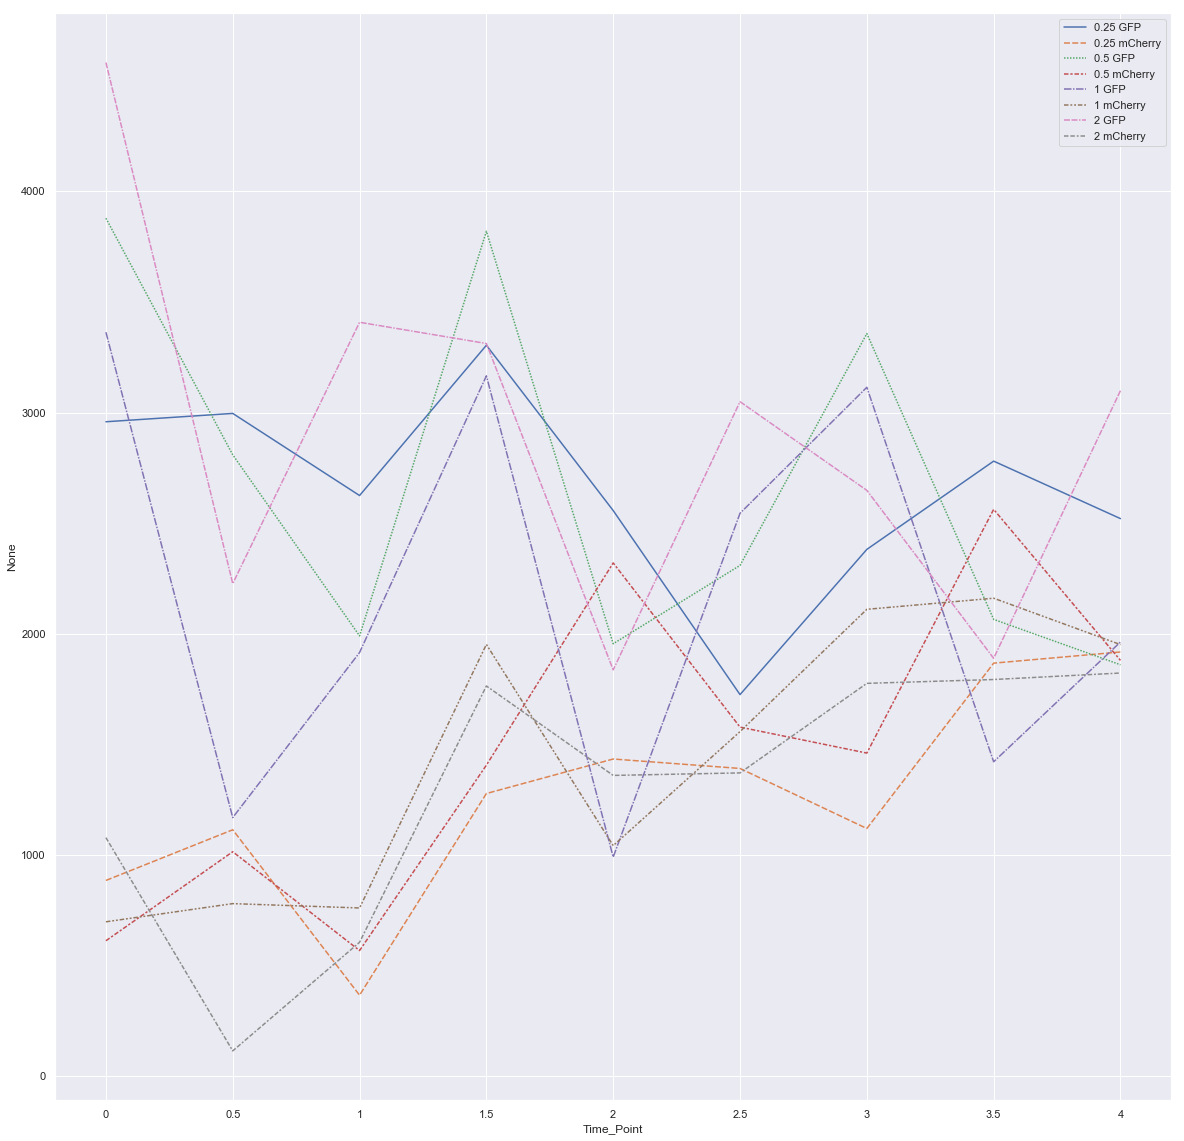

In [36]:
fig,ax=plt.subplots(figsize=(20,20))

sns.lineplot(data=h7)

#ax.fill_between(h7.index,y1=h7["0.25 GFP"]-total_standard["0.25 GFP"],y2=h7["0.25 GFP"]+total_standard["0.25 GFP"],alpha=0.5)
#ax.fill_between(h7.index,y1=np.maximum(h7["0.25 mCherry"]-total_standard["0.25 mCherry"],0),y2=h7["0.25 mCherry"]+total_standard["0.25 mCherry"],alpha=0.5)

#ax.fill_between(h7.index,y1=np.maximum(h7["0.5 GFP"]-total_standard["0.5 GFP"],0),y2=h7["0.5 GFP"]+total_standard["0.5 GFP"],alpha=0.5)
#ax.fill_between(h7.index,y1=np.maximum(h7["0.5 mCherry"]-total_standard["0.5 mCherry"],0),y2=h7["0.5 mCherry"]+total_standard["0.5 mCherry"],alpha=0.5)

#ax.fill_between(h7.index,y1=np.maximum(h7["1 GFP"]-total_standard["1 GFP"],0),y2=h7["1 GFP"]+total_standard["1 GFP"],alpha=0.5)
#ax.fill_between(h7.index,y1=np.maximum(h7["1 mCherry"]-total_standard["1 mCherry"],0),y2=h7["1 mCherry"]+total_standard["1 mCherry"],alpha=0.5)

#ax.fill_between(h7.index,y1=np.maximum(h7["2 GFP"]-total_standard["2 GFP"],0),y2=h7["2 GFP"]+total_standard["2 GFP"],alpha=0.5)
#ax.fill_between(h7.index,y1=np.maximum(h7["2 mCherry"]-total_standard["2 mCherry"],0),y2=h7["2 mCherry"]+total_standard["2 mCherry"],alpha=0.5)

Text(0.5,0,'Time(h)')

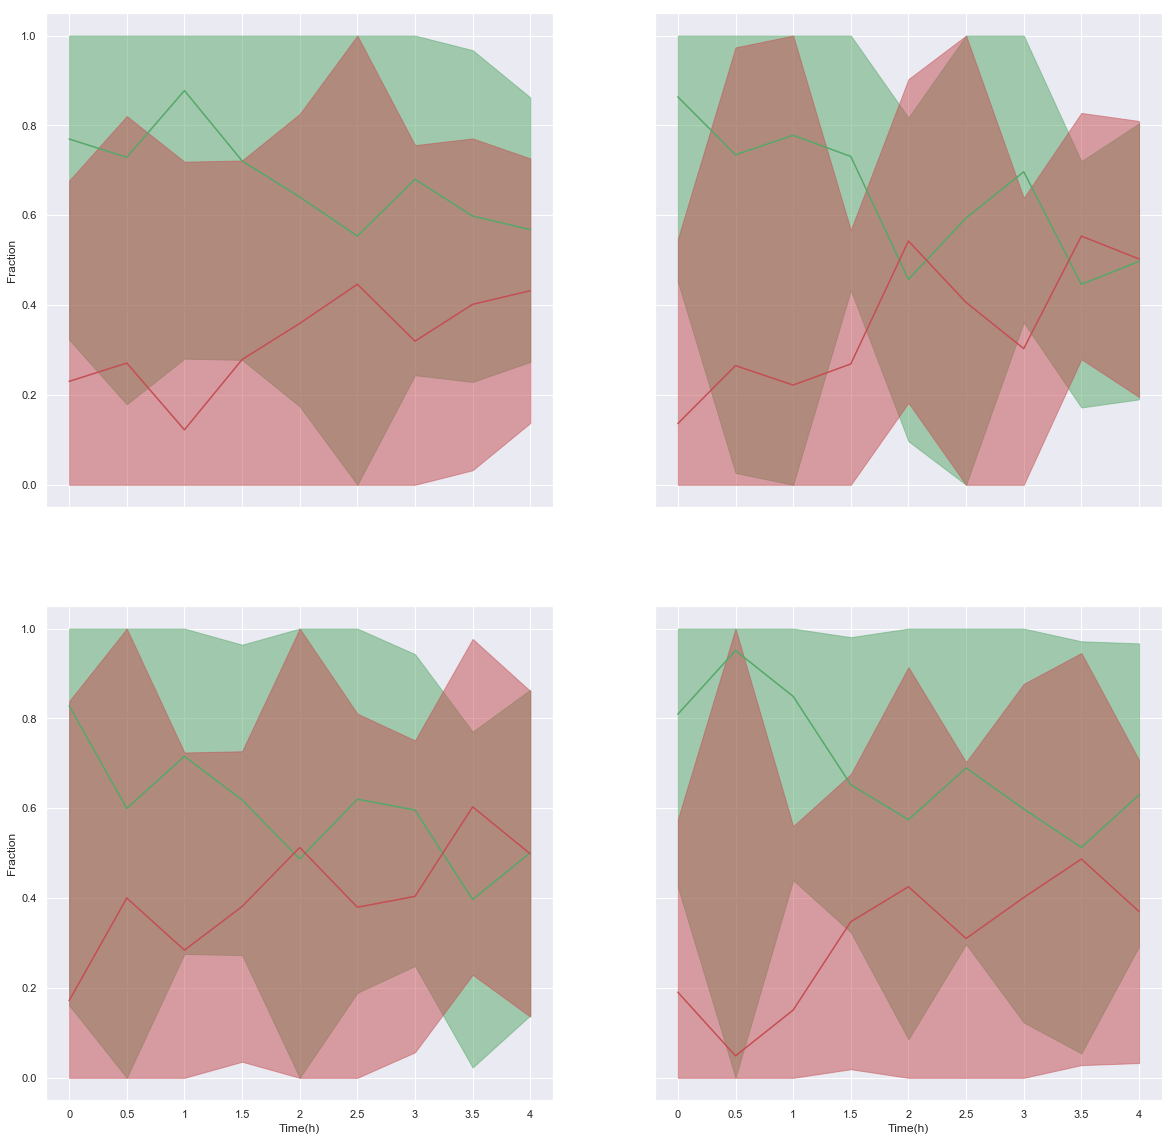

In [34]:
fig,ax=plt.subplots(2,2,figsize=(20,20),sharex=True,sharey=True)
sns.lineplot(data=frac,x=frac.index,y=frac["0.25 GFP frac"],ax=ax[0][0],color='g')
ax[0][0].fill_between(frac.index,y1=frac["min 0.25 GFP frac"],y2=frac["max 0.25 GFP frac"],alpha=0.5,color='g')
sns.lineplot(data=frac,x=frac.index,y=frac["0.25 mCherry frac"],ax=ax[0][0],color='r')
ax[0][0].fill_between(frac.index,y1=frac["min 0.25 mCherry"],y2=frac["max 0.25 mCherry"],alpha=0.5,color='r')

sns.lineplot(data=frac,x=frac.index,y=frac["0.5 GFP frac"],ax=ax[0][1],color='g')
ax[0][1].fill_between(frac.index,y1=frac["min 0.5 GFP frac"],y2=frac["max 0.5 GFP frac"],alpha=0.5,color='g')
sns.lineplot(data=frac,x=frac.index,y=frac["0.5 mCherry frac"],ax=ax[0][1],color='r')
ax[0][1].fill_between(frac.index,y1=frac["min 0.5 mCherry"],y2=frac["max 0.5 mCherry"],alpha=0.5,color='r')

sns.lineplot(data=frac,x=frac.index,y=frac["1 GFP frac"],ax=ax[1][0],color='g')
ax[1][0].fill_between(frac.index,y1=frac["min 1 GFP frac"],y2=frac["max 1 GFP frac"],alpha=0.5,color='g')
sns.lineplot(data=frac,x=frac.index,y=frac["1 mCherry frac"],ax=ax[1][0],color='r')
ax[1][0].fill_between(frac.index,y1=frac["min 1 mCherry"],y2=frac["max 1 mCherry"],alpha=0.5,color='r')

sns.lineplot(data=frac,x=frac.index,y=frac["2 GFP frac"],ax=ax[1][1],color='g')
ax[1][1].fill_between(frac.index,y1=frac["min 2 GFP frac"],y2=frac["max 2 GFP frac"],alpha=0.5,color='g')

sns.lineplot(data=frac,x=frac.index,y=frac["2 mCherry frac"],ax=ax[1][1],color='r')
ax[1][1].fill_between(frac.index,y1=frac["min 2 mCherry"],y2=frac["max 2 mCherry"],alpha=0.5,color='r')

ax[0][0].set_ylabel("Fraction")
ax[1][0].set_ylabel("Fraction")
ax[1][0].set_xlabel("Time(h)")
ax[1][1].set_xlabel('Time(h)')